In [49]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



# Problem 1
- show the anihilation / number operator yields eigenstate number n when acting on the eigenstate |n>

In [50]:

n = sp.Symbol('n', integer=True, positive=True)

#creation and annihilation operators
a_dag = sp.Symbol('a_dag')
a = sp.Symbol('a')

#number operator
N_hat = a_dag * a

#we define |n> = (1/sqrt(n!)) * (a_dag)**n |0>
factorial_n = sp.factorial(n)
ket_n = (1 / sp.sqrt(factorial_n)) * (a_dag**n)

#N_hat * |n>
N_ket_n = N_hat * ket_n

#apply
annihilation_action = a * (a_dag**n) - n * (a_dag**(n - 1))

#sympy sub and simplify
result = N_ket_n.subs(a * (a_dag**n), n * (a_dag**(n - 1))).simplify()

display(result)

a_dag**n*n/sqrt(factorial(n))

# Problem 2
- find psi_1(x) and psi_2(x) for the QHO
- show that they are orthogonal

1.0*sqrt(2)*m**0.75*omega**0.75*x*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**0.75)

1.0*(1.4142135623731*hbar**0.25*m**1.25*omega**1.25*x**2 - 0.707106781186548*hbar**1.25*m**0.25*omega**0.25)*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**1.5)

1.0*sqrt(2)*x*(0.816496580927726*hbar**0.75*m**1.75*omega**1.75*x**2 - 1.22474487139159*hbar**1.75*m**0.75*omega**0.75)*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**2.5)

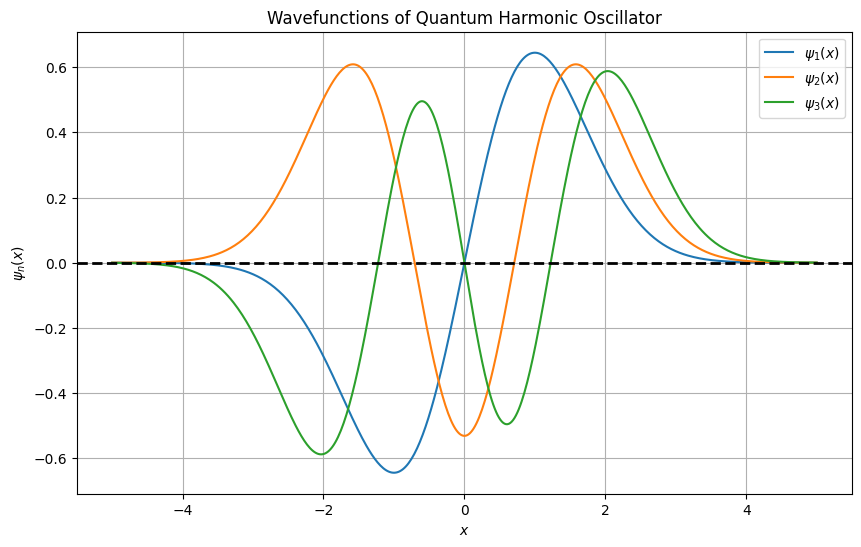

'Integral for n=1, m=1: 1.00000000000000'

'Integral for n=1, m=2: 0'

'Integral for n=1, m=3: -2.22044604925031E-16'

'Integral for n=2, m=1: 0'

'Integral for n=2, m=2: 1.00000000000000'

'Integral for n=2, m=3: 0'

'Integral for n=3, m=1: -2.22044604925031E-16'

'Integral for n=3, m=2: 0'

'Integral for n=3, m=3: 1.00000000000000'

In [51]:
#symbols
x, m, omega, hbar = sp.symbols('x m omega hbar', real=True, positive=True)

#generate wavefunction
def generate_wavefunctions(start, end):
    wavefunctions = {}
    #given ground
    psi_0 = (m * omega / (sp.pi * hbar))**(1/4) * sp.exp(-m * omega * x**2 / (2 * hbar))
    wavefunctions[0] = psi_0
    
    #ladder operators
    for n in range(1, end + 1):
        a_dagger = sp.sqrt(1 / (2 * hbar * m * omega)) * (-hbar * sp.diff(psi_0, x) + m * omega * x * psi_0)
        psi_n = sp.sqrt(1 / n) * a_dagger
        wavefunctions[n] = sp.simplify(psi_n)
        psi_0 = psi_n  # update psi_0 for next iteration
    
    return wavefunctions

#plot
def plot_wavefunctions(wavefunctions, start, end, x_range=(-5, 5)):
    x_vals = np.linspace(x_range[0], x_range[1], 500)
    plt.figure(figsize=(10, 6))

    for n in range(start, end + 1):
        #convert to np but keep rational precision
        psi_n = sp.lambdify(x, wavefunctions[n].subs({m: 1, omega: 1, hbar: 1}), 'numpy')
        plt.plot(x_vals, psi_n(x_vals), label=rf"$\psi_{n}(x)$")

    plt.title("Wavefunctions of Quantum Harmonic Oscillator")
    plt.xlabel("$x$")
    plt.ylabel(r"$\psi_n(x)$")
    plt.axhline(0, color='black', linewidth=2, linestyle='--')
    plt.legend()
    plt.grid()
    plt.savefig('p2_wavefunctions.png')
    plt.show()
    
def check_orthogonality(wavefunctions, start, end):
    orthogonality_results = {}
    for n in range(start, end + 1):
        for m in range(start, end + 1):
            #compute integral
            integral = sp.integrate(
                wavefunctions[n] * wavefunctions[m], 
                (x, -sp.oo, sp.oo)
            )
            orthogonality_results[(n, m)] = integral.simplify()
    return orthogonality_results



#function calls
start, end = 1, 3 #range of wavefunctions
wavefunctions = generate_wavefunctions(start, end)  #generate wavefunctions

#display
for n in range(start, end + 1):
    display(wavefunctions[n])
    
plot_wavefunctions(wavefunctions, start, end)
orthogonality_results = check_orthogonality(wavefunctions, start, end)
for key, value in orthogonality_results.items():
    display(f'Integral for n={key[0]}, m={key[1]}: {value}')

# Problem 3
- given a potential piecewise function, find allowed solutions for the QHO and energy levels
- we found that onhly odd solutions are allowed in this case because there is an infinite potential well at x=0


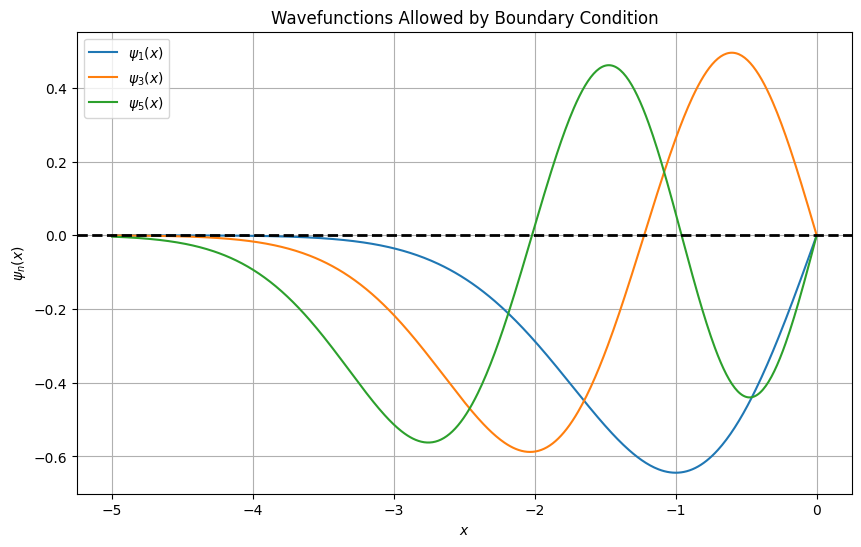

'Allowed energy level for n=1: 1.5*hbar*omega'

'Allowed energy level for n=3: 3.5*hbar*omega'

'Allowed energy level for n=5: 5.5*hbar*omega'

In [52]:
#symbols
x, m, omega, hbar = sp.symbols('x m omega hbar', real=True, positive=True)

#generate wavefunctions and determine allowed states
def generate_wavefunctions_and_filter(start, end):
    wavefunctions = {}
    allowed_wavefunctions = {}

    #given ground state
    psi_0 = (m * omega / (sp.pi * hbar))**(1/4) * sp.exp(-m * omega * x**2 / (2 * hbar))
    wavefunctions[0] = psi_0

    #ladder operators to generate all wavefunctions
    for n in range(1, end + 1):
        a_dagger = sp.sqrt(1 / (2 * hbar * m * omega)) * (-hbar * sp.diff(psi_0, x) + m * omega * x * psi_0)
        psi_n = sp.sqrt(1 / n) * a_dagger
        wavefunctions[n] = sp.simplify(psi_n)
        psi_0 = psi_n  # update psi_0 for next iteration

    #apply boundary condition to filter wavefunctions
    for n in range(0, end + 1):
        #check if psi_n(0) == 0
        if wavefunctions[n].subs(x, 0) == 0:
            allowed_wavefunctions[n] = wavefunctions[n]

    return allowed_wavefunctions

#plot wavefunctions
def plot_wavefunctions_filtered(wavefunctions, x_range=(-5, 0)):
    x_vals = np.linspace(x_range[0], x_range[1], 500)
    plt.figure(figsize=(10, 6))

    for n in wavefunctions.keys():
        #convert to np but keep rational precision
        psi_n = sp.lambdify(x, wavefunctions[n].subs({m: 1, omega: 1, hbar: 1}), 'numpy')
        plt.plot(x_vals, psi_n(x_vals), label=rf"$\psi_{n}(x)$")

    plt.title("Wavefunctions Allowed by Boundary Condition")
    plt.xlabel("$x$")
    plt.ylabel(r"$\psi_n(x)$")
    plt.axhline(0, color='black', linewidth=2, linestyle='--')
    plt.legend()
    plt.grid()
    plt.savefig('p3_wavefunctions.png')
    plt.show()

#calculate energy levels for allowed states
def calculate_energy_levels_filtered(wavefunctions):
    energy_levels = {}
    for n in wavefunctions.keys():
        energy_levels[n] = sp.simplify(hbar * omega * (n + 1 / 2))
    return energy_levels

#function calls
start, end = 0, 5  # states from n=0 to n=5
allowed_wavefunctions = generate_wavefunctions_and_filter(start, end)  #generate and filter wavefunctions

#plot allowed wavefunctions
plot_wavefunctions_filtered(allowed_wavefunctions)

#calculate and display energy levels for allowed states
allowed_energy_levels = calculate_energy_levels_filtered(allowed_wavefunctions)
for n, energy in allowed_energy_levels.items():
    display(f'Allowed energy level for n={n}: {energy}')
